## ECE 143Analysis of Ad-Hoc Communications Network##
Problem:

The problem I am trying to solve is an ad-hoc communications network over a large
rectangular region. Each individual tower can monitor a rectangular subsection of a specific
width and height. The main problem is that none of the individual towers can provide
coverage for the entire region of interest. Communications towers are unreliable and are put
up independently and at random. I have no control over where or how big a tower’s
footprint is placed. Importantly, due to technical issues such as cross-talk, no individual
rectangular subsection can have multiple towers providing coverage for it. That is, there can
be no overlap between any pair of rectangular subsections provided by the two respective
towers. In any case, the desire is to maximize the coverage area of any available
communications tower.
The order of when the towers come online is important. Once a tower has acquired its
rectangular section, no subsequent tower can overlap that section. You may assume the
following for this problem:

In [1]:
import matplotlib.pyplot as plt
from Functions import *
from Rectangles import Rectangle

## Question 1 ##
Problem:  Given an overall desired coverage footprint and a sequence of n communications
towers, what is the resulting resolved coverage?

The way I solved this problem is by using a random generator to determine the initial coordinates, width, and height of the number of rectangles given.  After this I loop thorugh all the rectangles adn trim/fit them into thier spaces such that the trim option that gives the greatest area after trimming is used.  This will allow me to maximize the area for the communication towers because when deciding how to trim, the best method to increase total area and not leave any gaps is to choose the trimming with the greatest area.  The trade off however is that later rectangles might make this decision pointless or the "wrong choice".  This can happen when the less area trim option covers area that is unique to only that rectangle when the larger trim option would later be covered up by other rectangles.  I used the more trivial solution rather than using a dynamic programming approach.

If the area is filled before all rectangles are used the program stops adding rectangles.  Similarly if a rectangle is completely inside another rectangle, smaller rectangle is not added to the diagram.

In [2]:
coverage_x = 25
coverage_y = 25
total_area = coverage_x*coverage_y
num_rects = 8
(before, after) = give_rects(coverage_x, coverage_y, num_rects)
print "Before:"
for b in before:
    print b
print "After:"
for a in after:
    print a

Before:
Lower left coordinate: (16, 11) 
Width: 5 
Height: 13

Lower left coordinate: (4, 1) 
Width: 18 
Height: 23

Lower left coordinate: (8, 6) 
Width: 17 
Height: 18

Lower left coordinate: (2, 2) 
Width: 23 
Height: 8

Lower left coordinate: (17, 3) 
Width: 7 
Height: 9

Lower left coordinate: (7, 0) 
Width: 3 
Height: 25

Lower left coordinate: (7, 2) 
Width: 9 
Height: 23

Lower left coordinate: (0, 3) 
Width: 22 
Height: 18

After:
Lower left coordinate: (16, 11) 
Width: 5 
Height: 13

Lower left coordinate: (4, 1) 
Width: 12 
Height: 23

Lower left coordinate: (21, 6) 
Width: 4 
Height: 18

Lower left coordinate: (16, 2) 
Width: 5 
Height: 8

Lower left coordinate: (21, 3) 
Width: 3 
Height: 3

Lower left coordinate: (7, 24) 
Width: 3 
Height: 1

Lower left coordinate: (10, 24) 
Width: 6 
Height: 1

Lower left coordinate: (0, 3) 
Width: 4 
Height: 18



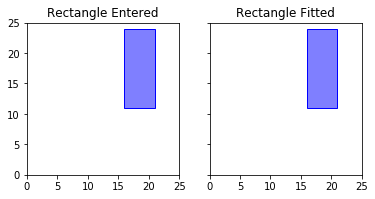

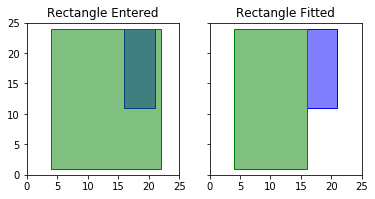

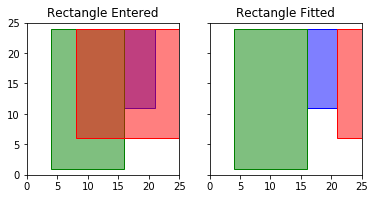

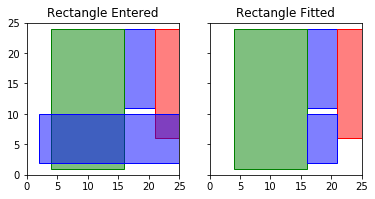

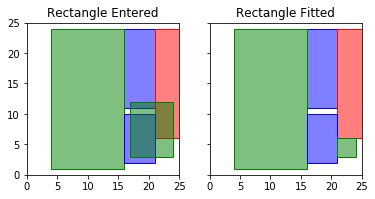

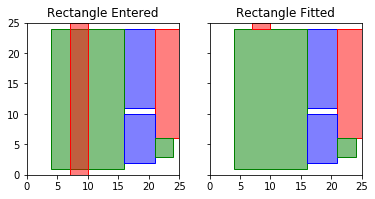

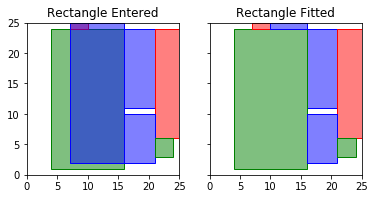

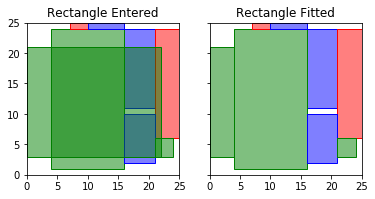

In [3]:
after_rects = rect_grid(after)
before_rects = rect_grid(before)

for j in range(0,num_rects):
    fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True)
    ax1.set_xlim(0, coverage_x)
    ax1.set_ylim(0, coverage_y)
    ax1.set_title('Rectangle Entered')
    ax1.set(adjustable='box-forced', aspect='equal')
    before_rects = rect_grid(before)
    after_rects = rect_grid(after)
    for i in after_rects[0:j]:
        ax1.add_patch(i)
    ax1.add_patch(before_rects[j])
    ax2.set(adjustable='box-forced', aspect='equal')
    ax2.set_title('Rectangle Fitted')
    after_rects = rect_grid(after)
    for i in after_rects[0:j+1]:
        ax2.add_patch(i)
plt.show()

## Question 2 ##
Problem:  What is the total area of coverage relative to the desired total coverage area of the
original footprint? That is, are there any gaps in coverage?

I solve this problem by calculating the total area of all the rectangles combined and comparing with that maximum area possibel.  If they are not equal, there must be gaps.

Usually when using a low number of rectangles the area is not completely filled.  To get rid of the gaps I would need to use more rectangles (proabably 25+) in order to almost guarantee that there are no gaps.  Thus to decrease the gap area, more rectangles must be added, although chances of a useful rectangle being added dimishes as the gaps disappear.

In [9]:
total = 0
for a in after:
    if a != None:
        total += a.height*a.width
if (total == coverage_x*coverage_y):
    print "There are no gaps because %s out of %s is covered" % (total,total_area)
else:
    print "There are gaps because only %s out of %s is covered" % (total,total_area)

There are gaps because only 423 out of 625 is covered


## Question 3 ##
Problem:  On average, how many communications towers are required before full coverage is
obtained?

I solve this problem by adding random rectangles one by one until the area of all the rectangles in the current run is equal to the maximum area possible given the x and y widths and heights.  I add this number to a total and run the algorithm a large number of times and I get an average.  This average is different depending on how large the coverage area is but typically the average number of rectangles needed is slightly higher than the area squared.  I suspect this may be because the gaps are correlated with size of the coverage area.


In [10]:
total = 0
for i in range(0,1000):
    num_rects = num_cover_all(coverage_x,coverage_y)
    total += num_rects
print "The average number of rectangles to cover the whole area is %s" % (float(total)/1000)

The average number of rectangles to cover the whole area is 29.751


## Ending ##
In the end, there are many ways to generate cell towers in order to achieve the largest amount of area.  I chose the trivial method where I simply take the biggest trimmed rectangle and use that.  Although I believe a dynamic solution of determing whether a trimmed solution will benefit more in the future might work, however it may be more expensive or take too long.

A limitation of this problem is that the cell towers are generate randomly.  If we could somehow gennerate them such that the size of the rectangle and the location of the rectangle are determined more intelligently, the number of rectangles to fill up a given area could be decreased.

This project has allowed me to understand how to write better code quality, create better documentation, make decision based on limitations/trade-offs, and create visualizations that ultimately helped me analyze the problem better